# CHEM E 545: Midterm Project (60 points)

Gregory Moore, Annatu Somah, Babita Giri

In this project, we want to predict biodegradibility of different compounds. Supervised Machine Learning (SML) is an important tool that can take into account multiple attributes about a compound including its chemical structure and predict its biodegradability in the environment. SML models can help in figuring out which chemicals are going to be environment friendly helping in making responsible choices during chemical selection for different processes/products.

In this project, wherever you need to use a random_state/seed use the number 100. All plots should have title and labels 

## Part (a): Regression Task 

###  Data Preparation: (15 points)
Load the data file. Your data contains a feature called as 'Smiles'. The simplified molecular-input line-entry system (SMILES) is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings. You can read more [here](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system). 

We want to convert this string to actual molecular descriptors. <b> Hint </b>: You will have a total of 209 descriptors for each Smiles string. You can do that by using [rdkit](https://www.rdkit.org/) package and its descriptors. You can import these as follows:


In [63]:
!pip install rdkit
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

In [64]:
random_state = 100

In [65]:
reg_df = df = pd.read_csv("/Users/anna/Desktop/reg_data_545_midterm (1).csv")

In [66]:
reg_df

,Smiles,Reliability,Type,StandardTest,System_setup,reaction_time,Biodegradation
0,NC12CC3CC(CC(C3)C1)C2.[Cl-].[H+],2,Inherent,Test 302 B,DOC Die Away,28.0,0.100
1,Cl[Si](Cl)(c1ccccc1)c1ccccc1,1,Ready,Test 301 C,Closed Respirometer,28.0,0.000
2,[O-][n+]1ccccc1[S-][Zn+2][S-]c1cccc[n+]1[O-],1,Ready,Test 301 B,CO2 Evolution,8.0,0.170
3,CC(CC=O)CC(C)(C)C,1,Ready,Test 301 C,Closed Respirometer,28.0,0.070
4,O=c1c2cccc3cccc(c32)c2nc3cccc4cccc(c43)n12,1,Ready,Test 301 F,Closed Respirometer,14.0,0.010
...,...,...,...,...,...,...,...
9995,Fc1ccc2c(c1)CC[C@@H]([C@H]1CO1)O2,1,Ready,Test 301 B,CO2 Evolution,28.0,0.080
9996,CCCCCCCCNC(=O)Nc1ccc(Cc2ccc(NC(=O)NCCCCCCCC)cc...,1,Ready,Test 301 B,CO2 Evolution,28.0,0.210
9997,CC(C)C1=C[C@@]23CC[C@H]4[C@](C)(C(=O)O)CCC[C@]...,1,Inherent,Test 302 B,DOC Die Away,28.0,0.526
9998,CC(CC(=O)[O-])CC(C)(C)C.[Zn+2],2,Ready,Test 301 B,CO2 Evolution,28.0,0.412


In [67]:
#Optional Code to remove the hundreds of "WARNING: not removing hydrogen atom without neighbors" that appear during the calculations
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

#This code will take about 20 minutes to run completely, 
# it is working fine it just needs to do lots of computations
#so give it time :) 

df_mol_desc = pd.DataFrame()
for row in range(0,len(reg_df.index)): #For loop that goes from the start of the dataframe to the last row
    smile = reg_df.iloc[row]['Smiles'] #Temporary string holding the smile value for the current row
    mol = Chem.MolFromSmiles(smile) #convert SMILES string to Molecule object
    desc_dict = rdkit.Chem.Descriptors.CalcMolDescriptors(mol) #Dictionary with all the chem descriptors for the current molecule
    desc_df = pd.DataFrame([desc_dict]) #Convert the dictionary to a dataframe so that it can be concatenated in the next line
    df_mol_desc = pd.concat([df_mol_desc, desc_df], axis=0)
    row = row + 1 

df_mol_desc

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.320833,6.320833,0.000000,0.000000,0.519261,55.250000,187.714,169.570,187.112777,70,...,0,0,0,0,0,0,0,0,0,0
0,6.491327,6.491327,1.027346,-2.511080,0.569960,11.333333,253.204,243.124,251.992882,76,...,0,0,0,0,0,0,0,0,0,0
0,11.378134,11.378134,0.716093,-1.077315,0.349414,11.058824,317.710,309.646,315.931862,84,...,0,0,0,0,0,0,0,0,0,0
0,10.101122,10.101122,0.363519,0.363519,0.553535,14.800000,142.242,124.098,142.135765,60,...,0,0,0,0,0,0,0,0,0,0
0,13.332122,13.332122,0.009210,-0.009210,0.299012,12.160000,320.351,308.255,320.094963,116,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,12.882412,12.882412,0.174038,-0.186600,0.636907,29.214286,194.205,183.117,194.074308,74,...,0,0,0,0,0,0,0,0,0,0
0,12.097286,12.097286,0.152400,-0.152400,0.152906,10.648649,508.751,460.367,508.377727,204,...,0,0,0,0,0,0,0,0,10,2
0,12.868569,12.868569,0.006412,-1.018508,0.114103,48.847458,819.045,752.517,818.460513,324,...,0,0,0,0,0,0,0,0,0,0
0,10.184456,10.184456,0.000000,-0.942824,0.673478,13.333333,222.623,205.487,221.051448,66,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#This code just saves the data as a CSV if you would like to open it 
#in excel and look around in it
df_mol_desc.to_csv('df_mol_desc.csv')

#Un-comment this code if you would like to read in the data from the csv 
#rather than spend time generating it from scratch
#df_mol_desc = pd.read_csv('df_mol_desc.csv')

Other than smiles, your dataset has 5 other features and one target/output variable (biodegradation percentage). You are trying to build a model using all the features to predict the percentage biodegradation. Therefore, combine the 209 descriptors  with the 5 remaining features from your dataset. Next, remove any rows that contains NaNs. Finally, remove any feature that still contains a smiles string and the feature 'Ipc'. 

In [69]:
#Cleaning up the data;  
complete_reg_data = pd.concat([reg_df, df_mol_desc.reset_index()], axis=1) #Comibining the data with the original features of the dataset
#Remove the smiles column and the Ipc feature, and drop any rows containing "NaN"
complete_reg_data = complete_reg_data.drop(['Smiles','Ipc','index'], axis= 1).dropna(how="any")
#Create dummy variables for the columns which have strings as their values
complete_reg_data = pd.get_dummies(complete_reg_data, columns = ['Type','StandardTest','System_setup'])
#Split into X(inputs) and Y(outputs) and report the sizes of each
X_reg = complete_reg_data.drop(['Biodegradation'], axis=1)
print('X inputs shape is ' + str(X_reg.shape))

Y_reg = complete_reg_data['Biodegradation']
print('Y outputs shape is ' + str(Y_reg.shape))
complete_reg_data.to_csv('complete_reg_data.csv')

X inputs shape is (8832, 230)
Y outputs shape is (8832,)


In [70]:
complete_reg_data.head()

,Reliability,reaction_time,Biodegradation,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,StandardTest_Test 301 D,StandardTest_Test 301 E,StandardTest_Test 301 F,StandardTest_Test 302 B,StandardTest_Test 302 C,StandardTest_Test 310,System_setup_CO2 Evolution,System_setup_Closed Bottle Test,System_setup_Closed Respirometer,System_setup_DOC Die Away
0,2,28.0,0.1000,6.320833,6.320833,0.000000,0.000000,0.519261,55.250000,187.714,...,0,0,0,1,0,0,0,0,0,1
1,1,28.0,0.0000,6.491327,6.491327,1.027346,-2.511080,0.569960,11.333333,253.204,...,0,0,0,0,0,0,0,0,1,0
3,1,28.0,0.0700,10.101122,10.101122,0.363519,0.363519,0.553535,14.800000,142.242,...,0,0,0,0,0,0,0,0,1,0
4,1,14.0,0.0100,13.332122,13.332122,0.009210,-0.009210,0.299012,12.160000,320.351,...,0,0,1,0,0,0,0,0,1,0
5,1,28.0,0.0593,10.818153,10.818153,0.576637,-0.908344,0.315336,13.000000,458.001,...,0,0,0,0,0,0,1,0,0,0


###  Model Developement and Testing: (15 points)

Implement linear regression using your data. Plot the boxplot of R2 values for a test split of [0.4,0.35,0.3,0.25,0.2,0.1]. Also plot your predicted and actual values as a scatter plot at the test split of 0.1. 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Function to perform linear regression and return R2 value
def linear_regression_test_split(x, y, ts):
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=ts, random_state=random_state)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    return r2

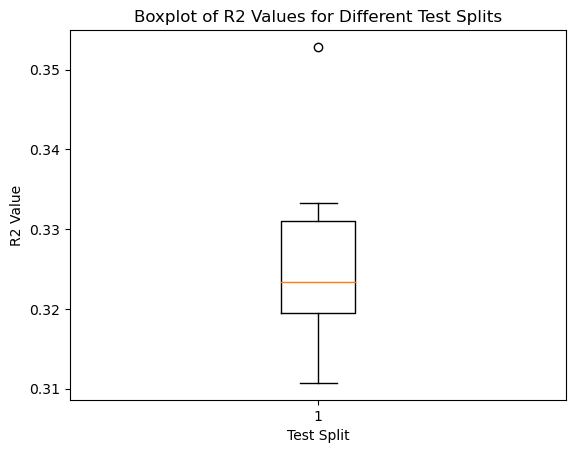

[0.3107167641344425,
 0.32268909296767334,
 0.32407263857880175,
 0.31836641536016397,
 0.3332761814402073,
 0.3528621940316825]

In [74]:
# Plot boxplot of R2 values for different test splits
test_splits = [0.4, 0.35, 0.30, 0.25, 0.201, 0.1]
r2_values=[]
r2_values = [linear_regression_test_split(X_reg, Y_reg, split) for split in test_splits]
plt.boxplot(r2_values)
plt.xlabel('Test Split')
plt.ylabel('R2 Value')
plt.title('Boxplot of R2 Values for Different Test Splits')
plt.show()
r2_values

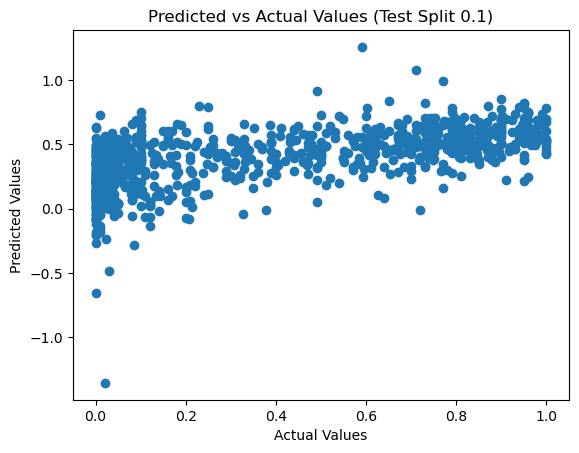

In [77]:
# Plot predicted vs actual values for a test split of 0.1
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.1, random_state=100)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Split 0.1)')
plt.show()

### Something New (5 points)

Implement any regression model of your choice that we haven't learnt in the class. Print the R2 value

In [79]:
#Implement a new regression algorithm of your choice here (Random Forest Regression)
from sklearn.ensemble import RandomForestRegressor
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=100)
# Create and fit the model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
# Predict and evaluate
y_pred_rf = rf_model.predict(x_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("R2 Value for Random Forest Regression:", r2_rf)

R2 Value for Random Forest Regression: 0.5777607515198423


## Part (b): Classification Task 


### Data Preparation (5 points)
Load the data file. Your data contains a feature called as 'Smiles'. Use the same code as before to convert it into actual molecular descriptors. <b> Hint </b>: You will have a total of 209 descriptors for each Smiles string. Next, remove any rows that contains NaNs. Finally, remove any feature that still contains a smiles string and the feature 'Ipc'. Class labels of 0 and 1 are also provided in the data file. 

In [81]:
class_df = pd.read_excel('/Users/anna/Downloads/class_data_545_midterm.xlsx')

In [83]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

df_mol_desc_class = pd.DataFrame()
for row in range(0,len(class_df.index)): #For loop that goes from the start of the dataframe to the last row
    smile_2 = class_df.iloc[row]['Smiles'] #Temporary string holding the smile value for the current row
    mol_2 = Chem.MolFromSmiles(smile_2) #convert SMILES string to Molecule object
    desc_dict_2 = rdkit.Chem.Descriptors.CalcMolDescriptors(mol_2) #Dictionary with all the chem descriptors for the current molecule
    desc_df_2 = pd.DataFrame([desc_dict_2]) #Convert dictionary to dataframe
    df_mol_desc_class = pd.concat([df_mol_desc_class, desc_df_2], axis=0)
df_mol_desc_class

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.173100,11.173100,0.405828,-0.405828,0.586359,11.062500,216.192,208.128,216.042259,80,...,0,0,0,0,0,0,0,0,0,0
0,12.852376,12.852376,0.020103,-0.572111,0.292535,11.241379,391.511,362.279,391.214744,152,...,0,0,0,0,0,0,0,0,0,0
0,8.871743,8.871743,0.365741,0.365741,0.694302,21.692308,184.323,160.131,184.182715,78,...,0,0,0,0,0,0,0,0,0,0
0,11.700542,11.700542,0.088987,-0.100305,0.737699,51.952381,286.415,260.207,286.193280,114,...,0,0,0,0,0,0,0,0,0,0
0,11.299171,11.299171,0.240375,-0.375099,0.137965,17.560000,350.543,312.239,350.282095,144,...,0,0,0,0,0,0,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,13.258107,13.258107,0.059355,-4.771851,0.321004,11.842105,544.861,530.749,544.086571,194,...,0,0,0,0,1,0,0,0,0,0
0,11.446157,11.446157,0.366852,0.366852,0.567161,32.909091,154.253,136.109,154.135765,64,...,0,0,0,0,0,0,0,0,0,0
0,10.203017,10.203017,0.184583,-0.184583,0.542210,9.777778,130.187,116.075,130.099380,54,...,0,0,0,0,0,0,0,0,0,0
0,5.349815,5.349815,0.000000,0.000000,0.322813,13.904762,305.149,281.965,305.177394,120,...,0,0,0,0,0,0,0,0,2,0


In [85]:
df_mol_desc_class.to_csv('df_mol_desc_class.csv')
#df_mol_desc_class = pd.read_csv('df_mol_desc_class.csv')
complete_class_data = pd.concat([class_df, df_mol_desc_class.reset_index(drop=True)], axis = 1)
complete_class_data = complete_class_data.drop(['Smiles','Ipc','Unnamed: 0'],axis = 1).dropna(how='any')
complete_class_data.to_csv('complete_class_data.csv')

In [86]:
x_class = complete_class_data.drop(['Class'],axis = 1)
z = x_class.shape
print(f'The shape of x inputs is {z}')
y_class = complete_class_data['Class']
p = y_class.shape
print(f'The shape of y output is {p}')

The shape of x inputs is (3544, 209)
The shape of y output is (3544,)


###  Model Developement and Testing: (15 points)

Implement Logistic Regression. Do you notice something when you use the default solver? Use the solver 'newton-cholesky' to see if the issue resolves. Why could this be happening? Print the test accuracy and the confusion matrix for the test data. Use a test split of 0.2

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
# Split the data
x_train_class, x_test_class, y_train_class, y_test_class =train_test_split(x_class, y_class, test_size=0.2, random_state=random_state)

In [88]:
 # Implement Logistic Regression with the default solver
lr_model_default = LogisticRegression(random_state=100, max_iter=4000) 
lr_model_default.fit(x_train_class, y_train_class)
y_pred_default = lr_model_default.predict(x_test_class)
# Print test accuracy and confusion matrix for default solver 
print("Test Accuracy (Default Solver):", accuracy_score(y_test_class,y_pred_default))
print("Confusion Matrix (Default Solver):\n", confusion_matrix(y_test_class,y_pred_default))

Test Accuracy (Default Solver): 0.7729196050775741
Confusion Matrix (Default Solver):
 [[372  83]
 [ 78 176]]


/Users/anna/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
from sklearn.linear_model import LogisticRegression
lr_model_newton = LogisticRegression(random_state=100,solver='newton-cholesky',max_iter=4000)
lr_model_newton.fit(x_train_class, y_train_class)
y_pred_newton = lr_model_newton.predict(x_test_class)
# Print test accuracy and confusion matrix for 'newton-cholesky' solver
print("\nTest Accuracy (Newton-Cholesky Solver):", accuracy_score(y_test_class,y_pred_newton))
print("Confusion Matrix (Newton-Cholesky Solver):\n",confusion_matrix(y_test_class, y_pred_newton))


Test Accuracy (Newton-Cholesky Solver): 0.7870239774330042
Confusion Matrix (Newton-Cholesky Solver):
 [[377  78]
 [ 73 181]]


### Something New (5 points)
Plot the ROC curve using the test data for the logistic regression model implemented above

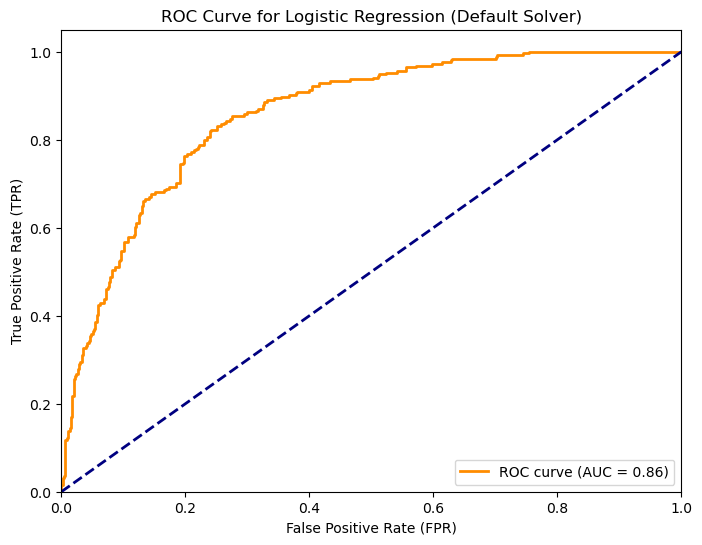

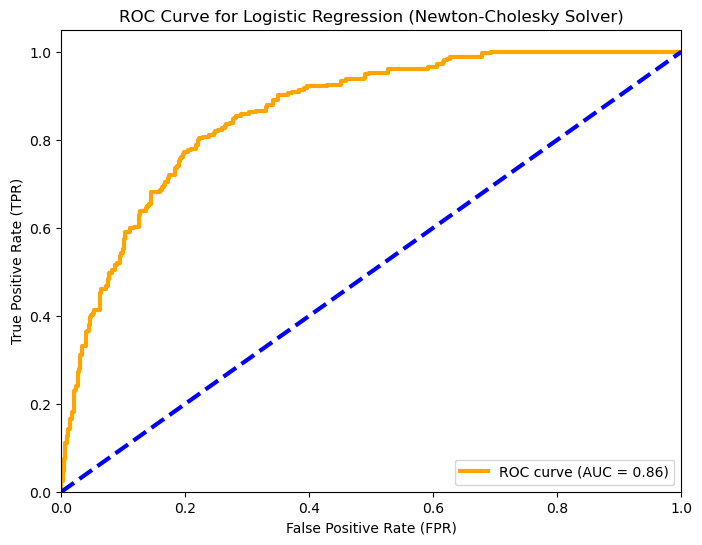

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the positive class for default Solver
y_prob_default = lr_model_default.predict_proba(x_test_class)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_class, y_prob_default)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression (Default Solver)')
plt.legend(loc='lower right')
plt.show()
# Get predicted probabilities for the positive class for Newton-Cholesky
y_prob_newton = lr_model_newton.predict_proba(x_test_class)[:, 1]
# Compute ROC curve and ROC area
fpr_newton, tpr_newton, thresholds_newton = roc_curve(y_test_class,y_prob_newton)
roc_auc_newton = auc(fpr_newton, tpr_newton)
# Plot ROC curve for 'newton-cholesky' solver
plt.figure(figsize=(8, 6))
plt.plot(fpr_newton, tpr_newton, color='orange', lw=3, label='ROC curve (AUC = {:.2f})'.format(roc_auc_newton))
plt.plot([0, 1], [0, 1], color='blue', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression (Newton-Cholesky Solver)')
plt.legend(loc='lower right')
plt.show()

With the default solver the logistic regression was unable to converge in the maximum 4000 iterations. However the newton cholesky solver is better because it uses quadratic approximation which approaches the global minimum of the cost function quicker, allowing it to complete in fewer iterations. 